In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 7, Finished, Available, Finished)

In [3]:
df = pd.read_parquet("Users/akumar63/input/fhvhv2020.parquet")
df.head()

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 8, Finished, Available, Finished)

,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,bcf,sales_tax,congestion_surcharge,driver_pay,date,month,day,estimated_emissions,emission_levels
0,B02864,B02864,00:40:13,00:43:34,00:45:34,01:02:20,148,90,1.075002,6.914731,3.448081,0.565314,1.308333,2.75,2.957511,01-01-2020,1,1,434.300979,0
1,B02682,B02682,00:42:31,00:46:33,00:47:50,00:53:23,114,79,0.593327,5.811141,2.760010,0.314811,0.837248,2.75,2.471484,01-01-2020,1,1,239.704045,0
2,B02764,B02764,00:01:42,00:02:06,00:04:37,00:21:49,4,125,1.261298,6.940222,2.811208,0.385262,0.871293,2.75,2.543961,01-01-2020,1,1,509.564340,0
3,B02764,B02764,00:21:23,00:26:02,00:26:36,00:33:00,231,113,0.746688,5.953243,2.244956,0.190620,0.559616,2.75,1.922788,01-01-2020,1,1,301.661931,0
4,B02764,B02764,00:32:20,00:37:06,00:37:49,00:46:59,114,144,0.741937,6.311735,2.531313,0.254642,0.708036,2.75,2.162173,01-01-2020,1,1,299.742687,0


In [4]:
df.tail()

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 9, Finished, Available, Finished)

,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,bcf,sales_tax,congestion_surcharge,driver_pay,date,month,day,estimated_emissions,emission_levels
60692345,B02864,B02864,23:02:45,23:06:42,23:07:01,23:23:12,61,72,1.609438,6.879356,2.889260,0.412110,0.920283,0.00,2.708717,12-31-2020,12,31,650.212917,0
60692346,B02864,B02864,23:28:28,23:30:02,23:32:03,00:14:09,35,238,2.634045,7.721792,3.714060,0.879627,1.532557,2.75,3.590439,12-31-2020,12,31,1064.154094,0
60692347,B02764,B02764,22:57:29,22:59:50,23:00:50,23:25:32,238,42,1.662030,7.301822,2.878637,0.405465,0.912283,2.75,2.986692,12-31-2020,12,31,671.460266,0
60692348,B02764,B02764,23:25:51,23:26:50,23:28:52,23:35:07,42,247,0.774727,5.929589,2.211566,0.215111,0.542324,0.00,2.112635,12-31-2020,12,31,312.989776,0
60692349,B02764,B02764,23:35:54,23:37:58,23:39:46,23:50:35,247,60,1.141033,6.476972,2.395164,0.262364,0.631272,0.00,2.350422,12-31-2020,12,31,460.977334,0


In [5]:
df.shape

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 10, Finished, Available, Finished)

(60692350, 20)

In [6]:
df.info()

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 11, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60692350 entries, 0 to 60692349
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 9.0+ GB


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

def analyze_uber_patterns(df):
    # Extract hours from time columns
    def extract_hour(time_val):
        if isinstance(time_val, str):
            return int(time_val.split(':')[0])
        elif hasattr(time_val, 'hour'):  # datetime or time object
            return time_val.hour
        else:
            return None  # or handle other cases as needed

    time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
    for col in time_columns:
        df[f'{col}_hour'] = df[col].apply(extract_hour)
    
    # Time-based analysis
    analysis = {
        'time_patterns': {
            'avg_emissions_by_hour': df.groupby('pickup_datetime_hour')['estimated_emissions'].mean().to_dict(),
            'avg_trip_time_by_hour': df.groupby('pickup_datetime_hour')['trip_time'].mean().to_dict(),
            'trip_count_by_hour': df.groupby('pickup_datetime_hour').size().to_dict(),
            'avg_congestion_by_hour': df.groupby('pickup_datetime_hour')['congestion_surcharge'].mean().to_dict()
        },
        'location_patterns': {
            'highest_emission_routes': df.groupby(['PULocationID', 'DOLocationID'])['estimated_emissions'].mean().nlargest(5).to_dict(),
            'busiest_pickup_locations': df['PULocationID'].value_counts().head().to_dict(),
            'highest_emission_pickups': df.groupby('PULocationID')['estimated_emissions'].mean().nlargest(5).to_dict()
        },
        'efficiency_metrics': {
            'emissions_per_mile': (df['estimated_emissions'] / df['trip_miles']).mean(),
            'emissions_per_minute': (df['estimated_emissions'] / df['trip_time']).mean(),
            # Removed problematic wait time calculation
        },
        'correlations': {
            'congestion_vs_emissions': df['congestion_surcharge'].corr(df['estimated_emissions']),
            'distance_vs_emissions': df['trip_miles'].corr(df['estimated_emissions']),
            'time_vs_emissions': df['trip_time'].corr(df['estimated_emissions'])
        }
    }
    
    return analysis

def print_insights(analysis):
    print("\n=== TIME-BASED PATTERNS ===")
    hours_by_emissions = sorted(analysis['time_patterns']['avg_emissions_by_hour'].items(), 
                              key=lambda x: x[1], reverse=True)
    print(f"Top 3 Hours for Emissions:")
    for hour, emission in hours_by_emissions[:3]:
        print(f"Hour {hour}: {emission:.2f} emissions")
    
    print("\n=== LOCATION INSIGHTS ===")
    print("Top 3 High-Emission Routes (PU->DO):")
    for (pu, do), emission in list(analysis['location_patterns']['highest_emission_routes'].items())[:3]:
        print(f"From {pu} to {do}: {emission:.2f} emissions")
    
    print("\n=== EFFICIENCY METRICS ===")
    print(f"Average emissions per mile: {analysis['efficiency_metrics']['emissions_per_mile']:.2f}")
    print(f"Average emissions per minute: {analysis['efficiency_metrics']['emissions_per_minute']:.2f}")
    
    print("\n=== CORRELATIONS ===")
    print(f"Distance vs Emissions correlation: {analysis['correlations']['distance_vs_emissions']:.3f}")
    print(f"Congestion vs Emissions correlation: {analysis['correlations']['congestion_vs_emissions']:.3f}")
    print(f"Trip Time vs Emissions correlation: {analysis['correlations']['time_vs_emissions']:.3f}")

# Example usage:
# results = analyze_uber_patterns(df)
# print_insights(results)

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 12, Finished, Available, Finished)

In [8]:
results = analyze_uber_patterns(df)
print_insights(results)

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 13, Finished, Available, Finished)


=== TIME-BASED PATTERNS ===
Top 3 Hours for Emissions:
Hour 5: 648.01 emissions
Hour 4: 637.34 emissions
Hour 6: 628.52 emissions

=== LOCATION INSIGHTS ===
Top 3 High-Emission Routes (PU->DO):
From 2 to 108: 1112.99 emissions
From 5 to 209: 1112.99 emissions
From 11 to 253: 1112.99 emissions

=== EFFICIENCY METRICS ===
Average emissions per mile: 404.00
Average emissions per minute: 83.41

=== CORRELATIONS ===
Distance vs Emissions correlation: 1.000
Congestion vs Emissions correlation: 0.104
Trip Time vs Emissions correlation: 0.843


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, time

def analyze_time_distance_patterns(df):
    def calculate_time_diff_minutes(time1, time2):
        """Calculate difference between two time objects in minutes"""
        if pd.notnull(time1) and pd.notnull(time2):
            if isinstance(time1, time):
                minutes1 = time1.hour * 60 + time1.minute + time1.second / 60
            else:
                time1 = pd.to_datetime(time1)
                minutes1 = time1.hour * 60 + time1.minute + time1.second / 60
                
            if isinstance(time2, time):
                minutes2 = time2.hour * 60 + time2.minute + time2.second / 60
            else:
                time2 = pd.to_datetime(time2)
                minutes2 = time2.hour * 60 + time2.minute + time2.second / 60
                
            return minutes2 - minutes1
        return None

    # Extract hour from datetime or time columns
    def extract_hour(x):
        if pd.isnull(x):
            return None
        if isinstance(x, time):
            return x.hour
        if isinstance(x, str):
            try:
                dt = pd.to_datetime(x)
                return dt.hour
            except:
                return None
        if isinstance(x, pd.Timestamp) or isinstance(x, datetime):
            return x.hour
        return None
        
    # Extract hour from datetime columns
    time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
    for col in time_columns:
        df[f'{col}_hour'] = df[col].apply(extract_hour)
        
    # Add day of week (assuming pickup_datetime is a proper datetime)
    if isinstance(df['pickup_datetime'].iloc[0], str):
        df['day'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
    elif isinstance(df['pickup_datetime'].iloc[0], (datetime, pd.Timestamp)):
        df['day'] = df['pickup_datetime'].dt.day_name()
    else:
        df['day'] = 'Unknown'  # fallback if we can't determine the day

    # Calculate service duration
    df['service_duration'] = df.apply(
        lambda x: calculate_time_diff_minutes(x['pickup_datetime'], x['dropoff_datetime']), 
        axis=1
    )
    
    # Time-based analysis
    time_analysis = {
        'hourly_patterns': {
            # Basic hourly metrics
            'trips_per_hour': df.groupby('pickup_datetime_hour').size().to_dict(),
            'avg_emissions_by_hour': df.groupby('pickup_datetime_hour')['estimated_emissions'].mean().to_dict(),
            'avg_distance_by_hour': df.groupby('pickup_datetime_hour')['trip_miles'].mean().to_dict(),
            'avg_duration_by_hour': df.groupby('pickup_datetime_hour')['service_duration'].mean().to_dict(),
            
            # Efficiency metrics by hour
            'emissions_per_mile_by_hour': df.groupby('pickup_datetime_hour').apply(
                lambda x: x['estimated_emissions'].sum() / x['trip_miles'].sum() if x['trip_miles'].sum() > 0 else 0
            ).to_dict(),
            
            # Peak hours analysis
            'peak_hours': {
                'by_trips': df.groupby('pickup_datetime_hour').size().nlargest(3).to_dict(),
                'by_emissions': df.groupby('pickup_datetime_hour')['estimated_emissions'].mean().nlargest(3).to_dict(),
                'by_distance': df.groupby('pickup_datetime_hour')['trip_miles'].mean().nlargest(3).to_dict()
            },
            
            # Off-peak analysis
            'off_peak_hours': {
                'by_trips': df.groupby('pickup_datetime_hour').size().nsmallest(3).to_dict(),
                'by_emissions': df.groupby('pickup_datetime_hour')['estimated_emissions'].mean().nsmallest(3).to_dict(),
                'by_distance': df.groupby('pickup_datetime_hour')['trip_miles'].mean().nsmallest(3).to_dict()
            },
            
            # Congestion patterns
            'congestion_by_hour': df.groupby('pickup_datetime_hour')['congestion_surcharge'].mean().to_dict(),
            'high_congestion_hours': df.groupby('pickup_datetime_hour')['congestion_surcharge'].mean().nlargest(3).to_dict()
        },
        
        'daily_patterns': {
            'trips_per_day': df.groupby('day').size().to_dict(),
            'avg_emissions_by_day': df.groupby('day')['estimated_emissions'].mean().to_dict(),
            'avg_distance_by_day': df.groupby('day')['trip_miles'].mean().to_dict(),
            'peak_days': df.groupby('day')['estimated_emissions'].mean().nlargest(3).to_dict()
        },
        
        'time_efficiency': {
            'best_hours_emissions': df.groupby('pickup_datetime_hour')['estimated_emissions'].mean().nsmallest(5).to_dict(),
            'best_hours_congestion': df.groupby('pickup_datetime_hour')['congestion_surcharge'].mean().nsmallest(5).to_dict(),
        }
    }
    
    # Distance-based analysis
    # Create distance bins
    df['distance_category'] = pd.qcut(df['trip_miles'], q=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
    
    # Calculate optimal hours by distance category
    optimal_hours = {}
    for category in df['distance_category'].unique():
        category_data = df[df['distance_category'] == category]
        best_hours = category_data.groupby('pickup_datetime_hour')['estimated_emissions'].mean().nsmallest(3)
        optimal_hours[category] = best_hours.to_dict()
    
    distance_analysis = {
        'distance_patterns': {
            # Basic distance metrics
            'trips_by_distance': df.groupby('distance_category').size().to_dict(),
            'avg_emissions_by_distance': df.groupby('distance_category')['estimated_emissions'].mean().to_dict(),
            'emissions_per_mile': df.groupby('distance_category').apply(
                lambda x: x['estimated_emissions'].sum() / x['trip_miles'].sum() if x['trip_miles'].sum() > 0 else 0
            ).to_dict(),
            
            # Distance efficiency
            'efficiency_metrics': {
                'short_vs_long': {
                    'short_trips_efficiency': df[df['trip_miles'] <= df['trip_miles'].median()]['estimated_emissions'].mean(),
                    'long_trips_efficiency': df[df['trip_miles'] > df['trip_miles'].median()]['estimated_emissions'].mean(),
                    'short_trips_per_mile': (df[df['trip_miles'] <= df['trip_miles'].median()]['estimated_emissions'] / 
                                           df[df['trip_miles'] <= df['trip_miles'].median()]['trip_miles']).mean(),
                    'long_trips_per_mile': (df[df['trip_miles'] > df['trip_miles'].median()]['estimated_emissions'] / 
                                          df[df['trip_miles'] > df['trip_miles'].median()]['trip_miles']).mean()
                }
            },
            
            # Distance-time relationships
            'distance_by_hour': df.groupby(['pickup_datetime_hour', 'distance_category']).size().unstack().to_dict(),
            'optimal_hours_by_distance': optimal_hours
        },
        
        'route_analysis': {
            'high_emission_routes': df.groupby(['PULocationID', 'DOLocationID']).agg({
                'estimated_emissions': 'mean',
                'trip_miles': 'mean',
                'congestion_surcharge': 'mean'
            }).nlargest(5, 'estimated_emissions').to_dict()
        }
    }
    
    return time_analysis, distance_analysis

def print_detailed_insights(time_analysis, distance_analysis):
    print("\n=== TIME-BASED PATTERNS ===")
    print("\nPeak Hours (by trip count):")
    for hour, count in time_analysis['hourly_patterns']['peak_hours']['by_trips'].items():
        print(f"Hour {hour}: {count:.0f} trips")
        
    print("\nMost Efficient Hours (lowest emissions):")
    for hour, emissions in time_analysis['time_efficiency']['best_hours_emissions'].items():
        print(f"Hour {hour}: {emissions:.2f} emissions")
        
    print("\nHigh Congestion Hours:")
    for hour, surcharge in time_analysis['hourly_patterns']['high_congestion_hours'].items():
        print(f"Hour {hour}: ${surcharge:.2f} surcharge")
    
    print("\n=== DISTANCE-BASED PATTERNS ===")
    print("\nEmissions by Distance Category:")
    for category, emissions in distance_analysis['distance_patterns']['avg_emissions_by_distance'].items():
        print(f"{category}: {emissions:.2f} emissions")
    
    print("\nEfficiency Comparison:")
    efficiency = distance_analysis['distance_patterns']['efficiency_metrics']['short_vs_long']
    print(f"Short trips per mile: {efficiency['short_trips_per_mile']:.2f} emissions")
    print(f"Long trips per mile: {efficiency['long_trips_per_mile']:.2f} emissions")
    
    print("\nOptimal Hours by Distance Category:")
    optimal_hours = distance_analysis['distance_patterns']['optimal_hours_by_distance']
    for category, hours_dict in optimal_hours.items():
        for hour, emissions in hours_dict.items():
            print(f"{category} - Hour {hour}: {emissions:.2f} emissions")




StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 14, Finished, Available, Finished)

In [10]:
    time_results, distance_results = analyze_time_distance_patterns(df)
    print_detailed_insights(time_results, distance_results)

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 15, Finished, Available, Finished)


=== TIME-BASED PATTERNS ===

Peak Hours (by trip count):
Hour 18: 3812095 trips
Hour 17: 3715088 trips
Hour 19: 3672822 trips

Most Efficient Hours (lowest emissions):
Hour 17: 551.59 emissions
Hour 18: 552.95 emissions
Hour 16: 553.46 emissions
Hour 15: 554.98 emissions
Hour 14: 556.39 emissions

High Congestion Hours:
Hour 19: $0.92 surcharge
Hour 18: $0.92 surcharge
Hour 12: $0.88 surcharge

=== DISTANCE-BASED PATTERNS ===

Emissions by Distance Category:
Very Short: 279.28 emissions
Short: 405.43 emissions
Medium: 532.35 emissions
Long: 691.21 emissions
Very Long: 944.49 emissions

Efficiency Comparison:
Short trips per mile: 404.00 emissions
Long trips per mile: 404.00 emissions

Optimal Hours by Distance Category:
Short - Hour 13: 405.14 emissions
Short - Hour 14: 405.19 emissions
Short - Hour 12: 405.19 emissions
Very Short - Hour 3: 276.39 emissions
Very Short - Hour 2: 276.65 emissions
Very Short - Hour 4: 276.93 emissions
Medium - Hour 14: 531.81 emissions
Medium - Hour 8: 5

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time

def prepare_data(df):
    """Prepare the data by combining date and time fields"""
    # Convert time strings to datetime.time objects
    time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H:%M:%S').dt.time
    
    # Extract hour from pickup_datetime
    df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
    
    # Convert date string to datetime if it's not already
    if isinstance(df['date'].iloc[0], str):
        df['date'] = pd.to_datetime(df['date'])
    
    # Extract month from date
    df['month'] = df['date'].dt.month
    
    return df

def analyze_uber_patterns(df):
    # Prepare the data
    df = prepare_data(df)
    
    # Create figure with subplots
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Hourly Trip Volume
    plt.subplot(2, 2, 1)
    hourly_trips = df.groupby('hour').size()
    sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
    plt.title('Hourly Trip Distribution', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    
    # Add hour labels with AM/PM
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # Annotate peak and off-peak hours
    peak_hours = hourly_trips.nlargest(3)
    plt.text(0.02, 0.98, f'Peak Hours:\n' + '\n'.join([f'{h%12 or 12}{"AM" if h<12 else "PM"}: {v:,.0f} trips' 
                                                      for h, v in peak_hours.items()]),
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. Total Emissions by Hour
    plt.subplot(2, 2, 2)
    hourly_emissions = df.groupby('hour')['estimated_emissions'].mean()
    sns.lineplot(x=hourly_emissions.index, y=hourly_emissions.values, marker='o')
    plt.title('Average Emissions by Hour', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Emissions')
    
    # Add hour labels with AM/PM
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # Annotate lowest emission hours
    low_emission_hours = hourly_emissions.nsmallest(3)
    plt.text(0.02, 0.98, f'Lowest Emission Hours:\n' + '\n'.join([f'{h%12 or 12}{"AM" if h<12 else "PM"}: {v:.2f}' 
                                                                 for h, v in low_emission_hours.items()]),
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 3. Congestion by Hour
    plt.subplot(2, 2, 3)
    hourly_congestion = df.groupby('hour')['congestion_surcharge'].mean()
    sns.lineplot(x=hourly_congestion.index, y=hourly_congestion.values, marker='o')
    plt.title('Average Congestion Surcharge by Hour', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Congestion Surcharge ($)')
    
    # Add hour labels with AM/PM
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # Annotate high congestion hours
    high_congestion_hours = hourly_congestion.nlargest(3)
    plt.text(0.02, 0.98, f'Highest Congestion Hours:\n' + '\n'.join([f'{h%12 or 12}{"AM" if h<12 else "PM"}: ${v:.2f}' 
                                                                    for h, v in high_congestion_hours.items()]),
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Monthly Patterns with Emission Levels
    plt.subplot(2, 2, 4)
    monthly_data = df.groupby('month').agg({
        'pickup_datetime': 'count',
        'estimated_emissions': 'mean',
        'congestion_surcharge': 'mean',
        'emission_levels': 'mean'  # Added emission levels
    })
    
    # Create a normalized version for plotting
    monthly_normalized = monthly_data.copy()
    for col in monthly_normalized.columns:
        monthly_normalized[col] = monthly_normalized[col] / monthly_normalized[col].max()
    
    monthly_normalized.plot(marker='o')
    plt.title('Monthly Patterns (Normalized)', fontsize=12, pad=15)
    plt.xlabel('Month')
    plt.ylabel('Normalized Value')
    plt.legend(['Trip Volume', 'Avg Emissions', 'Congestion', 'Emission Levels'])
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print detailed insights
    print("\n=== DETAILED INSIGHTS ===")
    print("\nPeak Hours Analysis:")
    for hour, trips in peak_hours.items():
        print(f"{hour%12 or 12}{' AM' if hour<12 else ' PM'}: {trips:,.0f} trips")
    
    print("\nLowest Emission Hours:")
    for hour, emission in low_emission_hours.items():
        print(f"{hour%12 or 12}{' AM' if hour<12 else ' PM'}: {emission:.2f} units")
    
    print("\nHighest Congestion Hours:")
    for hour, congestion in high_congestion_hours.items():
        print(f"{hour%12 or 12}{' AM' if hour<12 else ' PM'}: ${congestion:.2f}")
    
    return {
        'hourly_trips': hourly_trips,
        'hourly_emissions': hourly_emissions,
        'hourly_congestion': hourly_congestion,
        'monthly_patterns': monthly_data
    }

def analyze_monthly_patterns(df):
    """Additional function for detailed monthly analysis"""
    monthly_analysis = df.groupby('month').agg({
        'pickup_datetime': 'count',
        'estimated_emissions': 'mean',
        'congestion_surcharge': 'mean',
        'trip_miles': 'mean',
        'emission_levels': 'mean'  # Added emission levels
    }).round(2)
    
    monthly_analysis.columns = ['Total Trips', 'Avg Emissions', 'Avg Congestion', 
                              'Avg Distance', 'Avg Emission Level']
    
    # Create monthly patterns visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for idx, col in enumerate(monthly_analysis.columns):
        monthly_analysis[col].plot(ax=axes[idx], marker='o', title=col)
        axes[idx].set_xlabel('Month')
        axes[idx].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return monthly_analysis



StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 16, Finished, Available, Finished)

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 17, Finished, Available, Finished)

/tmp/ipykernel_9181/2326198092.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


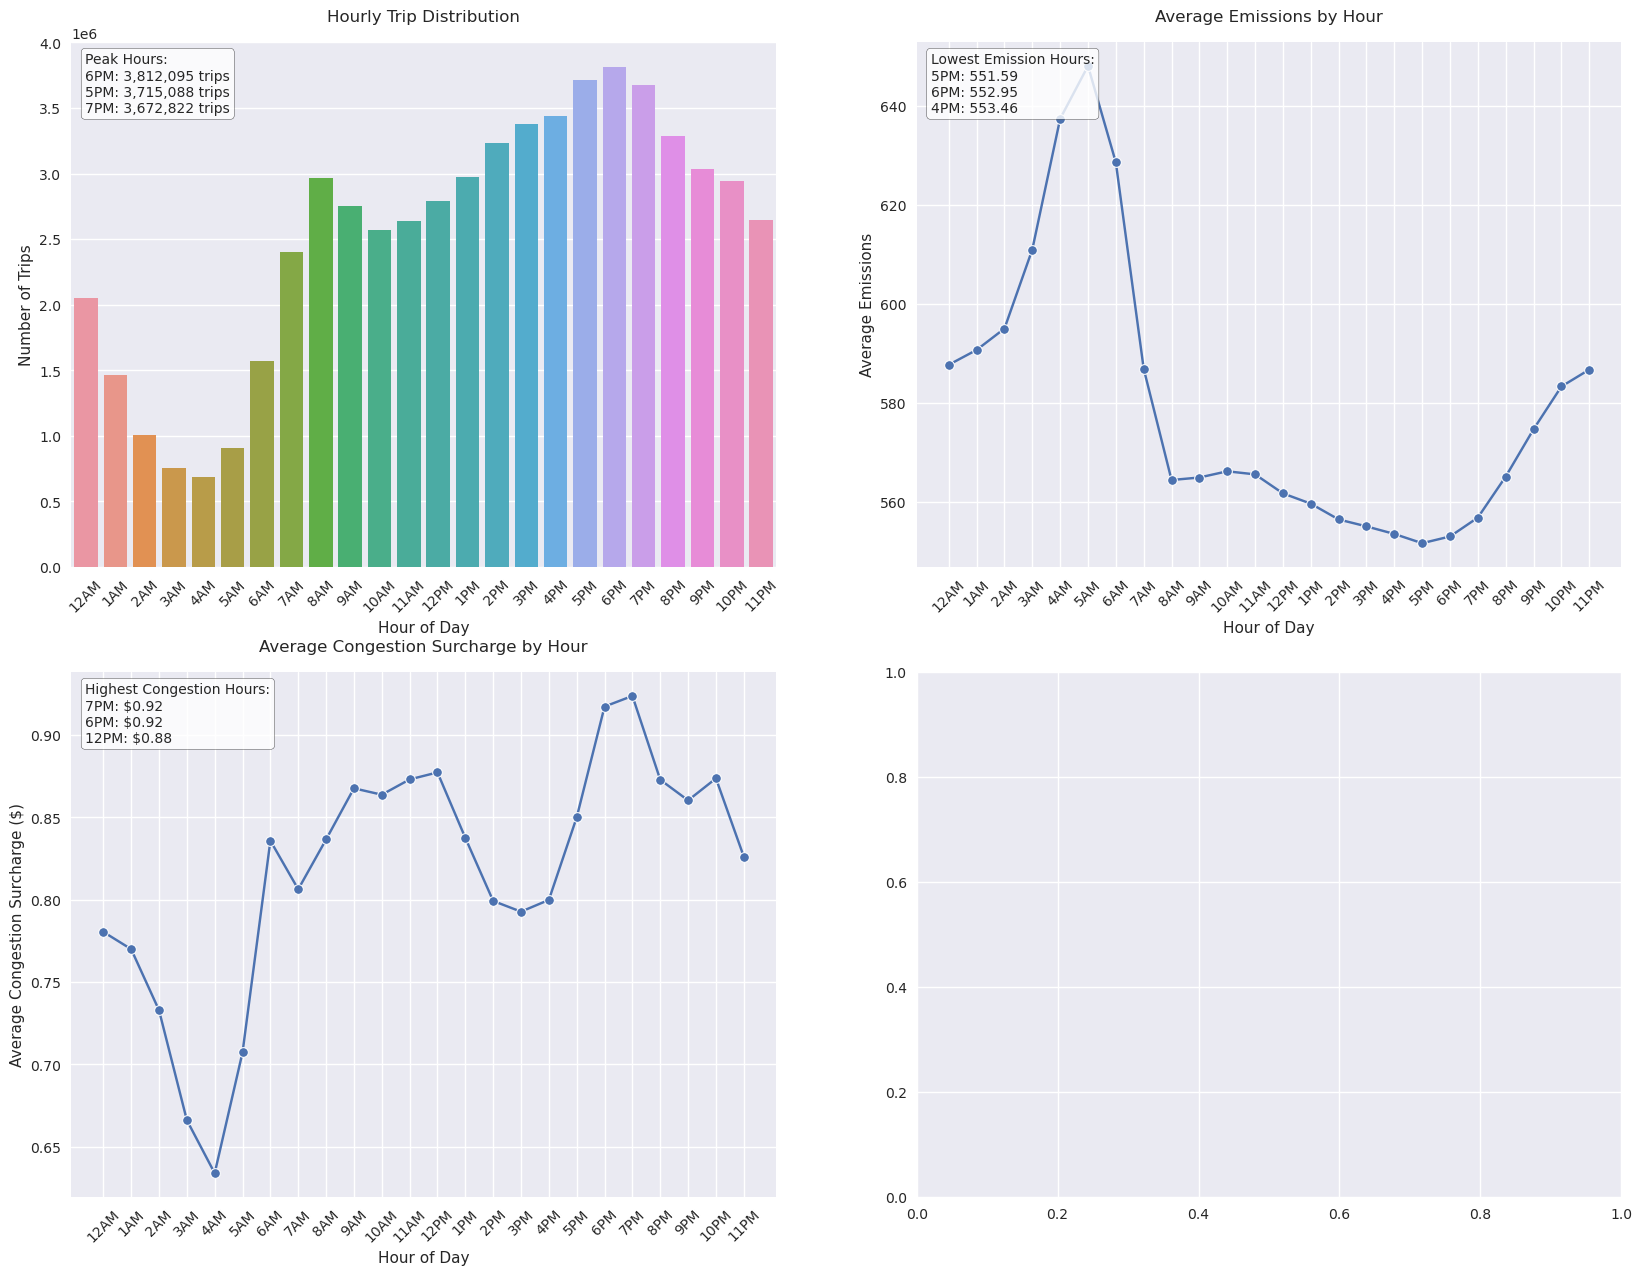

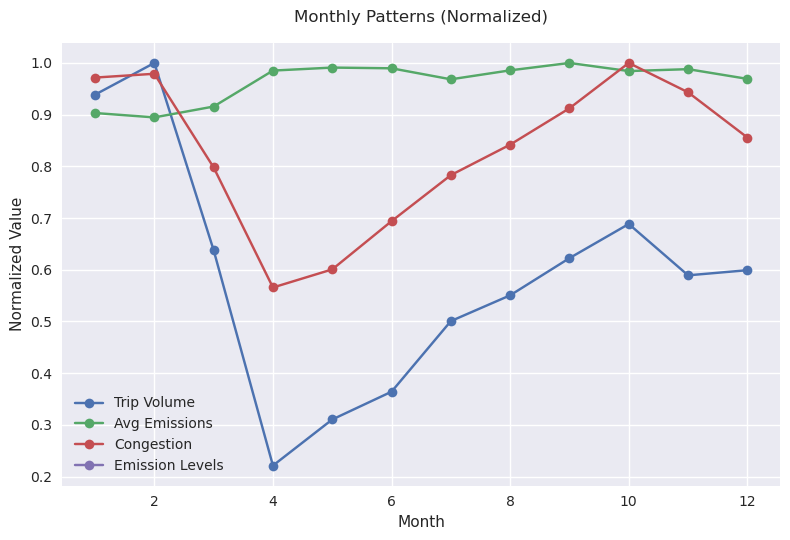


=== DETAILED INSIGHTS ===

Peak Hours Analysis:
6 PM: 3,812,095 trips
5 PM: 3,715,088 trips
7 PM: 3,672,822 trips

Lowest Emission Hours:
5 PM: 551.59 units
6 PM: 552.95 units
4 PM: 553.46 units

Highest Congestion Hours:
7 PM: $0.92
6 PM: $0.92
12 PM: $0.88


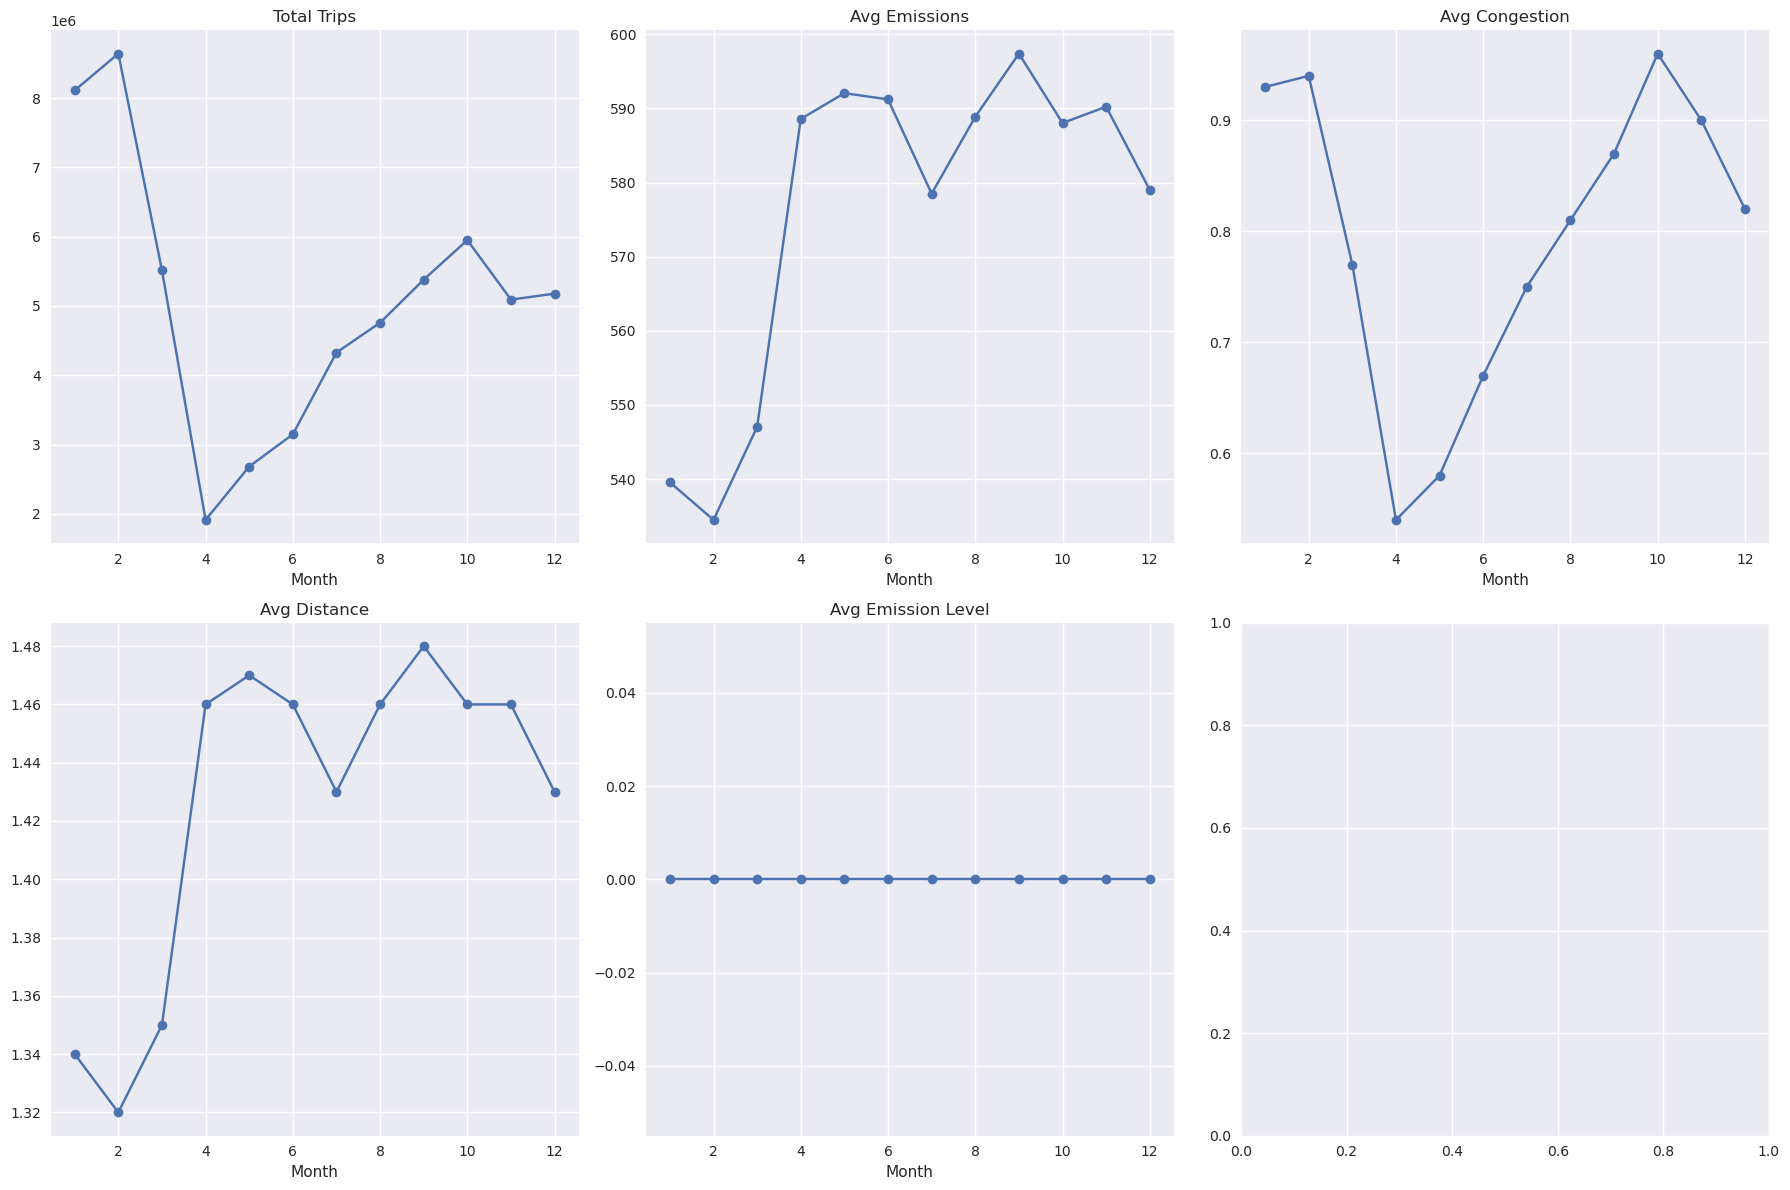

In [12]:
# Example usage:
#Assuming your data is in a DataFrame called 'df'
patterns = analyze_uber_patterns(df)
monthly_patterns = analyze_monthly_patterns(df)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time

def prepare_data(df):
    """Prepare the data by combining date and time fields"""
    # Make a copy to avoid modifying original dataframe
    df = df.copy()
    
    # Handle the date column first
    if 'date' in df.columns:
        # Convert date to datetime if it's not already
        if not pd.api.types.is_datetime64_any_dtype(df['date']):
            df['date'] = pd.to_datetime(df['date'])
        # Extract month from date column
        df['month'] = df['date'].dt.month
    
    # Convert time strings to datetime.time objects
    time_columns = ['request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']
    for col in time_columns:
        if col in df.columns:
            if not isinstance(df[col].iloc[0], time):  # Only convert if not already time
                df[col] = pd.to_datetime(df[col]).dt.time
    
    # Extract hour from pickup_datetime
    if 'pickup_datetime' in df.columns:
        df['hour'] = pd.to_datetime(df['pickup_datetime'].astype(str)).dt.hour
    
    return df

def analyze_uber_patterns(df):
    # Prepare the data
    df = prepare_data(df)
    
    # Calculate total emissions per hour (sum instead of mean)
    hourly_total_emissions = df.groupby('hour')['estimated_emissions'].sum()
    # Calculate average emissions per trip for each hour
    hourly_avg_emissions_per_trip = df.groupby('hour').agg(
        total_emissions=('estimated_emissions', 'sum'),
        total_trips=('hour', 'count')
    )
    hourly_avg_emissions_per_trip['avg_emissions_per_trip'] = (
        hourly_avg_emissions_per_trip['total_emissions'] / 
        hourly_avg_emissions_per_trip['total_trips']
    )
    
    # Create figure with subplots
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Hourly Trip Volume
    plt.subplot(2, 2, 1)
    hourly_trips = df.groupby('hour').size()
    sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
    plt.title('Hourly Trip Distribution', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # Annotate peak hours
    peak_hours = hourly_trips.nlargest(3)
    plt.text(0.02, 0.98, f'Peak Hours:\n' + '\n'.join([f'{h%12 or 12}{"AM" if h<12 else "PM"}: {v:,.0f} trips' 
                                                      for h, v in peak_hours.items()]),
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. Total Emissions by Hour
    plt.subplot(2, 2, 2)
    sns.lineplot(x=hourly_total_emissions.index, y=hourly_total_emissions.values, marker='o')
    plt.title('Total Emissions by Hour', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Emissions')
    
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # Annotate highest emission hours
    high_emission_hours = hourly_total_emissions.nlargest(3)
    plt.text(0.02, 0.98, f'Highest Emission Hours:\n' + '\n'.join([f'{h%12 or 12}{"AM" if h<12 else "PM"}: {v:,.0f}' 
                                                                 for h, v in high_emission_hours.items()]),
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 3. Average Emissions per Trip by Hour
    plt.subplot(2, 2, 3)
    sns.lineplot(x=hourly_avg_emissions_per_trip.index, 
                y=hourly_avg_emissions_per_trip['avg_emissions_per_trip'], 
                marker='o')
    plt.title('Average Emissions per Trip by Hour', fontsize=12, pad=15)
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Emissions per Trip')
    
    plt.xticks(range(24), [f'{h%12 or 12}{"AM" if h<12 else "PM"}' for h in range(24)], 
               rotation=45)
    
    # 4. Monthly Patterns with proper month handling
    plt.subplot(2, 2, 4)
    monthly_data = df.groupby('month').agg({
        'estimated_emissions': 'sum',
        'congestion_surcharge': 'mean',
        'emission_levels': 'mean'
    })
    # Add trip count
    monthly_trips = df.groupby('month').size()
    monthly_data['trip_count'] = monthly_trips
    
    # Create a normalized version for plotting
    monthly_normalized = monthly_data.copy()
    for col in monthly_normalized.columns:
        monthly_normalized[col] = monthly_normalized[col] / monthly_normalized[col].max()
    
    monthly_normalized.plot(marker='o')
    plt.title('Monthly Patterns (Normalized)', fontsize=12, pad=15)
    plt.xlabel('Month')
    plt.ylabel('Normalized Value')
    plt.legend(['Total Emissions', 'Avg Congestion', 'Emission Levels', 'Trip Count'])
    
    # Add month names to x-axis
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(range(1, 13), month_names, rotation=45)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print detailed insights
    print("\n=== DETAILED INSIGHTS ===")
    print("\nPeak Hours Analysis:")
    for hour, trips in peak_hours.items():
        print(f"{hour%12 or 12}{' AM' if hour<12 else ' PM'}: {trips:,.0f} trips")
    
    print("\nHighest Emission Hours (Total):")
    for hour, emission in high_emission_hours.items():
        print(f"{hour%12 or 12}{' AM' if hour<12 else ' PM'}: {emission:,.0f} units")
    
    print("\nMonthly Summary:")
    for month in range(1, 13):
        if month in monthly_data.index:
            print(f"\n{month_names[month-1]}:")
            print(f"Total Trips: {monthly_data.loc[month, 'trip_count']:,.0f}")
            print(f"Total Emissions: {monthly_data.loc[month, 'estimated_emissions']:,.0f}")
            print(f"Average Congestion: ${monthly_data.loc[month, 'congestion_surcharge']:.2f}")
    
    return {
        'hourly_trips': hourly_trips,
        'hourly_total_emissions': hourly_total_emissions,
        'hourly_avg_emissions_per_trip': hourly_avg_emissions_per_trip,
        'monthly_patterns': monthly_data
    }

StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 18, Finished, Available, Finished)

In [14]:
# Example usage:
#Assuming your data is in a DataFrame called 'df'
patterns = analyze_uber_patterns(df)


StatementMeta(d885626e-89e1-4249-ba22-2bd7adec0643, 84, 19, Submitted, Running, Running)